In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [10]:
df = pd.read_csv('adjacency_matrix1.csv', index_col='Id')
df_cluster = df.copy()
df_cluster.head()

,T1566,T1047,T1053,T1059,T1106,T1204,T1543,T1547,T1027,T1036,...,T1005,T1056,T1113,T1560,T1071,T1090,T1105,T1132,T1573,T1041
Id,,,,,,,,,,,,,,,,,,,,,
T1566,0.0,0,0,0.820144,0,0.935252,0,0.52518,0.719424,0.532374,...,0.0,0.0,0.0,0,0.553957,0,0.733813,0,0,0
T1047,0.0,0,0,0.834951,0,0.000000,0,0.00000,0.708738,0.000000,...,0.0,0.0,0.0,0,0.000000,0,0.000000,0,0,0
T1053,0.0,0,0,0.816993,0,0.000000,0,0.00000,0.718954,0.529412,...,0.0,0.0,0.0,0,0.666667,0,0.705882,0,0,0
T1059,0.0,0,0,0.000000,0,0.000000,0,0.00000,0.621076,0.000000,...,0.0,0.0,0.0,0,0.551570,0,0.670404,0,0,0
T1106,0.0,0,0,0.733728,0,0.000000,0,0.00000,0.775148,0.538462,...,0.0,0.0,0.0,0,0.627219,0,0.715976,0,0,0


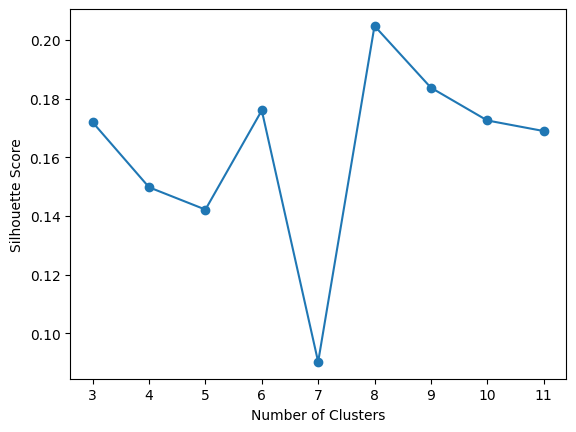

In [3]:
# Apply K-means clustering
k_values = [3,4,5,6,7,8,9,10,11]
silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    df_cluster['kmeans'] = model.fit_predict(df)
    silhouette_avg = silhouette_score(df, df_cluster['kmeans'])
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


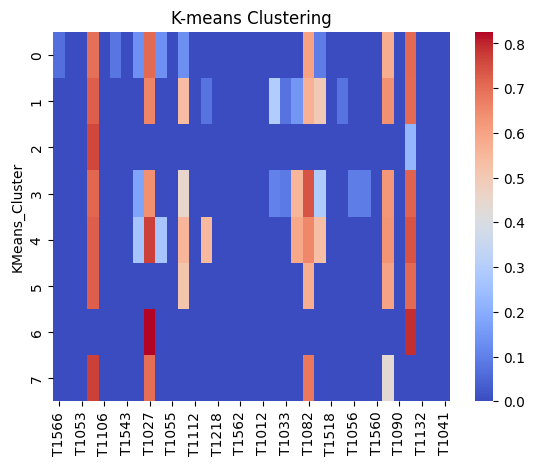

In [7]:
kmeans = KMeans(n_clusters=8, random_state=42)  # You can choose the number of clusters
kmeans.fit(df)
df['KMeans_Cluster'] = kmeans.labels_

silhouette_kmeans = silhouette_score(df, kmeans.labels_)
# Visualize the clusters using a heatmap
sns.heatmap(df.groupby('KMeans_Cluster').mean(), cmap='coolwarm')
plt.title('K-means Clustering')
plt.show()

df = df.drop(columns='KMeans_Cluster')

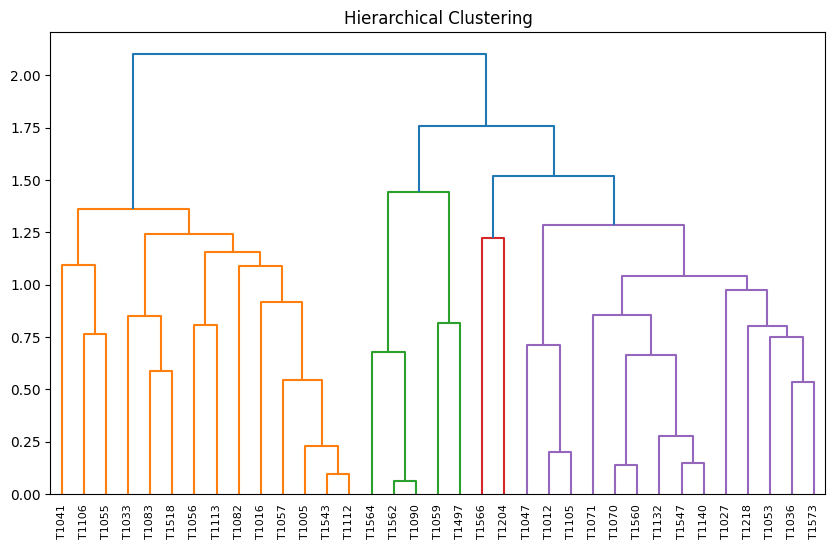

In [8]:
# Apply hierarchical clustering
linkage = hierarchy.linkage(df, method='complete', metric='euclidean')

# Visualize the clusters using a dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage, labels=df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering')
plt.show()

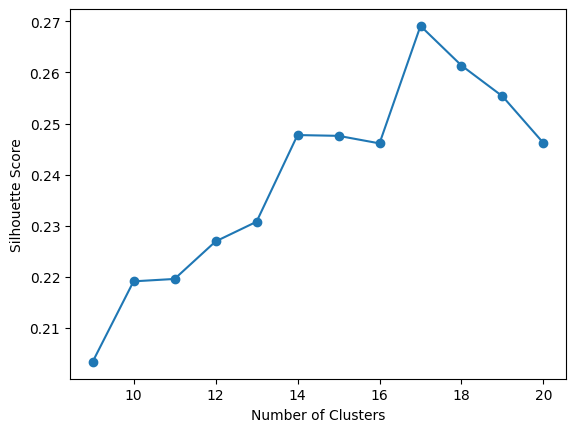

In [9]:
k_values = [9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_scores = []
for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    df_cluster['agg'] = model.fit_predict(df)
    silhouette_avg = silhouette_score(df, df_cluster['agg'])
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=18)
agg_labels = agg.fit_predict(df)
silhouette_agg = silhouette_score(df, agg_labels)

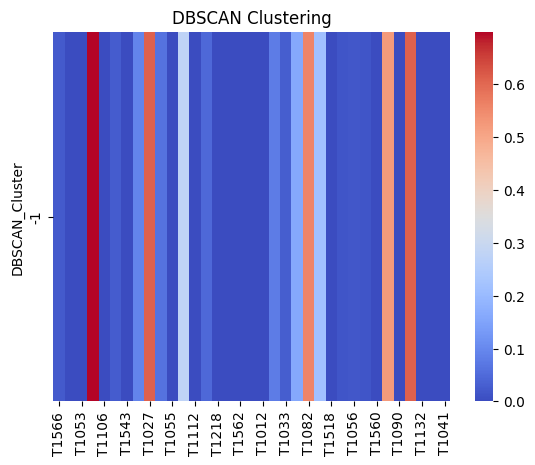

In [14]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)
df['DBSCAN_Cluster'] = dbscan_labels
#silhouette_dbscan = silhouette_score(df, dbscan_labels[dbscan_labels != -1])
# Visualize the clusters using a heatmap
sns.heatmap(df.groupby('DBSCAN_Cluster').mean(), cmap='coolwarm')
plt.title('DBSCAN Clustering')
plt.show()
df = df.drop(columns='DBSCAN_Cluster')

In [18]:
# Compare silhouette scores
print("Silhouette Score - KMeans:", silhouette_kmeans)
print("Silhouette Score - Agglomerative Clustering:", silhouette_agg)
#print("Silhouette Score - DBSCAN:", silhouette_dbscan)

Silhouette Score - KMeans: 0.4374307012153008
Silhouette Score - Agglomerative Clustering: 0.2613619332278252


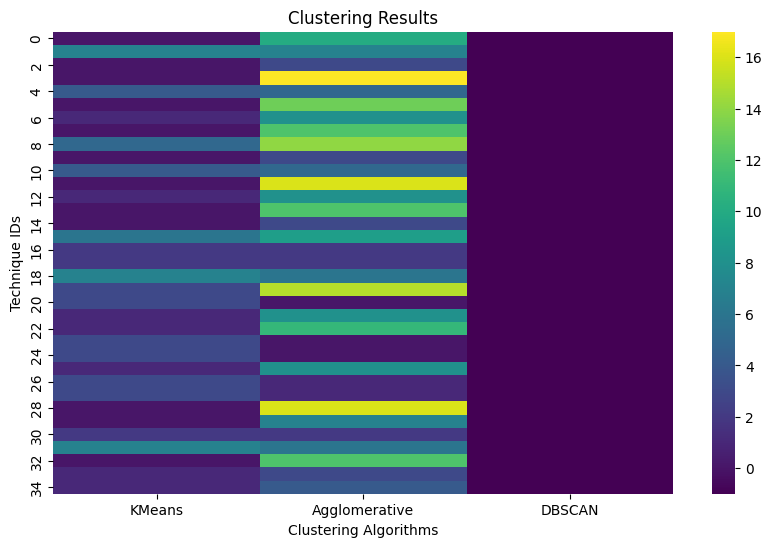

In [19]:

# Create a DataFrame with the clustering labels
clustered_df = pd.DataFrame({'KMeans': kmeans.labels_,
                             'Agglomerative': agg_labels,
                             'DBSCAN': dbscan_labels})

# Plot the clustered DataFrame as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(clustered_df, cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Clustering Algorithms')
plt.ylabel('Technique IDs')
plt.show()